# add Sleep end time - 0408

In [12]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [138]:
import pandas as pd

# CSV 파일 불러오기
file_path = '/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/GE_corrected_minutes_since_sleep_end.csv'

# 파일 로드 (인코딩 에러 방지)
df = pd.read_csv(file_path, encoding="utf-8")
df

,StudyID,Timestamp,Glucose,Relative_Day,Previous_1_Time,Previous_1_Glucose,Previous_1_T_Diff,Previous_2_Time,Previous_2_Glucose,Previous_2_T_Diff,...,Sleep_day,Sleep_end,Is_sleeping,Efficiency_3d_mean,Efficiency_3d_std,Efficiency_3d_slope,TimeInBed_3d_mean,TimeInBed_3d_std,TimeInBed_3d_slope,Minutes_Since_Sleep_End
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-10-05,2022-10-06 06:34:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022-10-06 01:49:00,76,1,2022-10-06 01:34:00,78.0,15.0,NaN,NaN,NaN,...,2022-10-05,2022-10-06 06:34:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2022-10-06 02:04:00,78,1,2022-10-06 01:49:00,76.0,15.0,2022-10-06 01:34:00,78.0,30.0,...,2022-10-05,2022-10-06 06:34:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2022-10-06 02:19:00,75,1,2022-10-06 02:04:00,78.0,15.0,2022-10-06 01:49:00,76.0,30.0,...,2022-10-05,2022-10-06 06:34:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2022-10-06 02:34:00,75,1,2022-10-06 02:19:00,75.0,15.0,2022-10-06 02:04:00,78.0,30.0,...,2022-10-05,2022-10-06 06:34:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,14,2023-05-09 18:53:00,86.0,15.0,2023-05-09 18:38:00,71.0,30.0,...,2023-05-08,2023-05-09 06:22:00,0,90.666667,0.472225,-0.5,287.333333,131.850618,15.0,766.0
71713,89,2023-05-09 19:23:00,136,14,2023-05-09 19:08:00,114.0,15.0,2023-05-09 18:53:00,86.0,30.0,...,2023-05-08,2023-05-09 06:22:00,0,90.666667,0.472225,-0.5,287.333333,131.850618,15.0,781.0
71714,89,2023-05-09 19:38:00,142,14,2023-05-09 19:23:00,136.0,15.0,2023-05-09 19:08:00,114.0,30.0,...,2023-05-08,2023-05-09 06:22:00,0,90.666667,0.472225,-0.5,287.333333,131.850618,15.0,796.0
71715,89,2023-05-09 19:53:00,137,14,2023-05-09 19:38:00,142.0,15.0,2023-05-09 19:23:00,136.0,30.0,...,2023-05-08,2023-05-09 06:22:00,0,90.666667,0.472225,-0.5,287.333333,131.850618,15.0,811.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71717 entries, 0 to 71716
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   StudyID                  71717 non-null  int64  
 1   Timestamp                71717 non-null  object 
 2   Glucose                  71717 non-null  int64  
 3   Relative_Day             71717 non-null  int64  
 4   Previous_1_Time          71643 non-null  object 
 5   Previous_1_Glucose       71643 non-null  float64
 6   Previous_1_T_Diff        71643 non-null  float64
 7   Previous_2_Time          71569 non-null  object 
 8   Previous_2_Glucose       71569 non-null  float64
 9   Previous_2_T_Diff        71569 non-null  float64
 10  Previous_3_Time          71495 non-null  object 
 11  Previous_3_Glucose       71495 non-null  float64
 12  Previous_3_T_Diff        71495 non-null  float64
 13  Previous_4_Time          71421 non-null  object 
 14  Previous_4_Glucose    

# Train RF Model 

Accuracy: 0.9831087375023287
F1 Score: 0.98290168468695


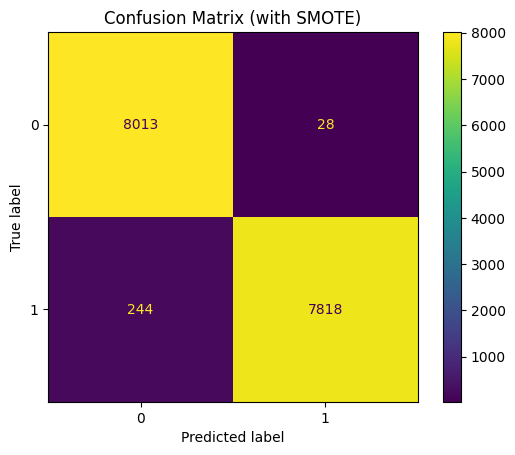

Model Accuracy: 0.9831087375023287

              precision    recall  f1-score   support

           0     0.9704    0.9965    0.9833      8041
           1     0.9964    0.9697    0.9829      8062

    accuracy                         0.9831     16103
   macro avg     0.9834    0.9831    0.9831     16103
weighted avg     0.9835    0.9831    0.9831     16103



In [143]:

# pip install imblearn

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report





# Feature columns selected for X
X_columns = [
    "Glucose", "is_weekend", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "Mean_Glucose_Pre_1h","Mean_Glucose_Pre_2h","Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h","Std_Glucose_Pre_2h","Std_Glucose_Pre_2.5h",
    "Monday","Tuesday","Wednesday","Thursday","Friday",
    "Time_24h", "bored", "hungry", "How_happy", "How_cheerful", 
    "How_relaxed", "How_stressed", "How_anxious", "How_angry", "How_sad", "How_energetic", 
    "How_tired", "How_lonely", "DailyAvgLoneliness", "T_Diff","Efficiency", "Efficiency_3d_mean",
    "Efficiency_3d_std","Efficiency_3d_slope", "TimeInBed_3d_mean","TimeInBed_3d_std","TimeInBed_3d_slope", 
    "Minutes_Since_Sleep_End"
]

# Preprocessing
df_model = df[X_columns + ["Onset_GE"]].dropna(subset=["Onset_GE"])
df_model["Time_24h"] = pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce").dt.hour + \
                       pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce").dt.minute / 60

X = df_model[X_columns]
y = df_model["Onset_GE"].astype(int)

X_imputed = SimpleImputer(strategy="mean").fit_transform(X)

# SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Train/test 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix (with SMOTE)")
plt.show()

# Calculate detailed metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a summary DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy_score(y_test, y_pred), precision, recall, f1_score(y_test, y_pred)]
})


# Print classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n" + classification_report(y_test, y_pred, digits=4))

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_43405/1980712257.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time_24h"] = pd.to_datetime(df["Time_24h"], format="%H:%M", errors="coerce").dt.hour + \


              precision    recall  f1-score   support

           0     0.9747    0.6665    0.7917      8034
           1     0.0405    0.4484    0.0742       252

    accuracy                         0.6599      8286
   macro avg     0.5076    0.5575    0.4330      8286
weighted avg     0.9463    0.6599    0.7699      8286



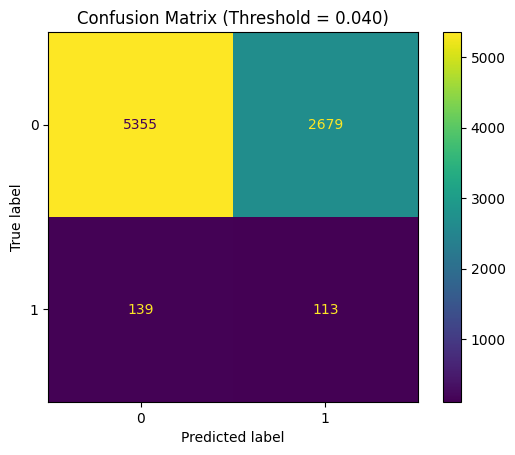


📊 Overall Model Performance Summary:
Accuracy         : 0.6599
F1 Score (Macro) : 0.4330
F1 Score (Weighted): 0.7699


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve


# 1. Define feature columns
X_columns = [
    "Glucose", "is_weekend", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "Mean_Glucose_Pre_1h","Mean_Glucose_Pre_2h","Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h","Std_Glucose_Pre_2h","Std_Glucose_Pre_2.5h",
    "Monday","Tuesday","Wednesday","Thursday","Friday",
    "Time_24h", "bored", "hungry", "How_happy", "How_cheerful", 
    "How_relaxed", "How_stressed", "How_anxious", "How_angry", "How_sad", "How_energetic", 
    "How_tired", "How_lonely", "DailyAvgLoneliness", "T_Diff","Efficiency", "Efficiency_3d_mean",
    "Efficiency_3d_std","Efficiency_3d_slope", "TimeInBed_3d_mean","TimeInBed_3d_std","TimeInBed_3d_slope", 
    "Minutes_Since_Sleep_End"
]

# 2. Clean data
df = df.dropna(subset=["Onset_GE"])
y = df["Onset_GE"].astype(int)

if df["Time_24h"].dtype == object:
    df["Time_24h"] = pd.to_datetime(df["Time_24h"], format="%H:%M", errors="coerce").dt.hour + \
                     pd.to_datetime(df["Time_24h"], format="%H:%M", errors="coerce").dt.minute / 60

X = df[X_columns]
X_imputed = SimpleImputer(strategy="mean").fit_transform(X)

# 3. Split data before SMOTE (to use same split)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 4. SMOTE for performance model
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model_smote.fit(X_train_smote, y_train_smote)

# 5. Evaluation (SMOTE model)


# 1. 확률 예측 및 threshold 적용
y_proba = model.predict_proba(X_test)[:, 1]
y_pred_opt = (y_proba >= 0.04).astype(int)

# 2. 상세 리포트
print(classification_report(y_test, y_pred_opt, digits=4))

# 3. Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_opt)
plt.title("Confusion Matrix (Threshold = 0.040)")
plt.show()

# ✅ 4. 전체 성능 요약
overall_accuracy = accuracy_score(y_test, y_pred_opt)
overall_f1_weighted = f1_score(y_test, y_pred_opt, average='weighted')
overall_f1_macro = f1_score(y_test, y_pred_opt, average='macro')

print("\n📊 Overall Model Performance Summary:")
print(f"Accuracy         : {overall_accuracy:.4f}")
print(f"F1 Score (Macro) : {overall_f1_macro:.4f}")
print(f"F1 Score (Weighted): {overall_f1_weighted:.4f}")

# Feature Importance

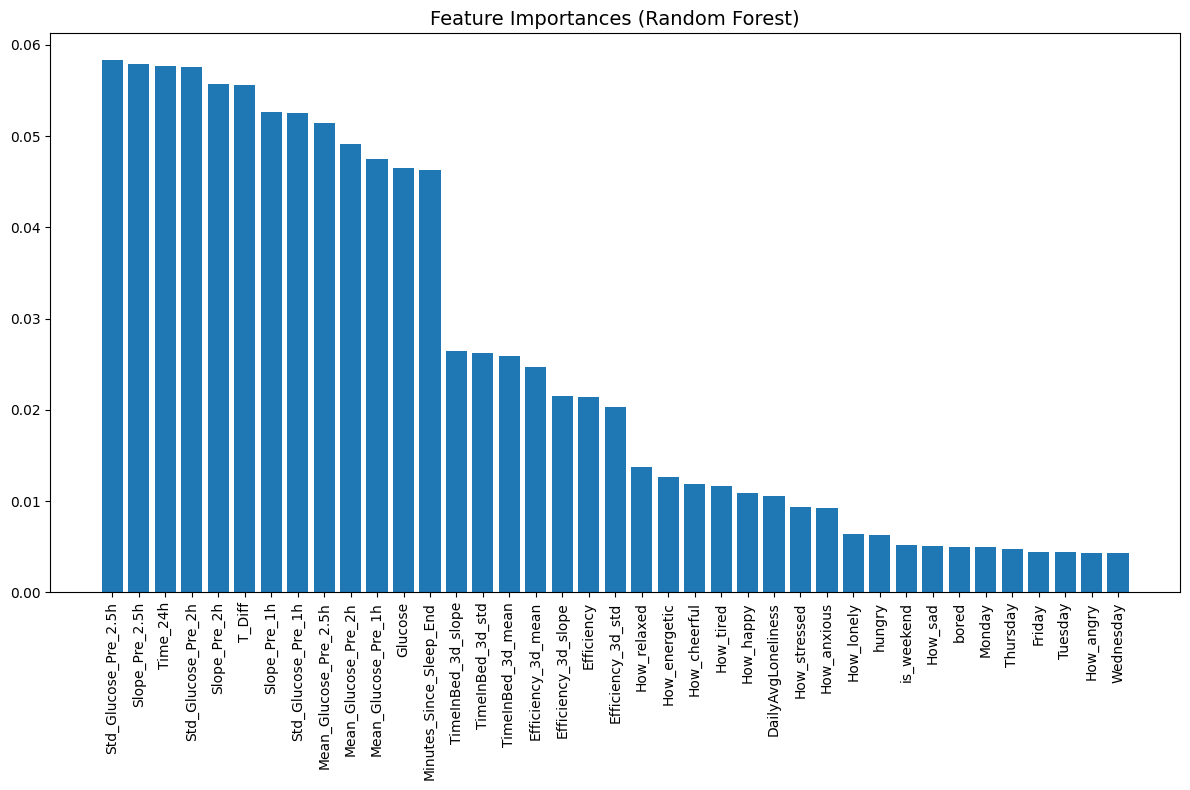


📌 Top 10 Feature Importances (Random Forest, No SMOTE):

              Feature  Importance
 Std_Glucose_Pre_2.5h    0.058332
       Slope_Pre_2.5h    0.057853
             Time_24h    0.057696
   Std_Glucose_Pre_2h    0.057547
         Slope_Pre_2h    0.055731
               T_Diff    0.055613
         Slope_Pre_1h    0.052636
   Std_Glucose_Pre_1h    0.052504
Mean_Glucose_Pre_2.5h    0.051429
  Mean_Glucose_Pre_2h    0.049154


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Feature columns
X_columns = [
    "Glucose", "is_weekend", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "Mean_Glucose_Pre_1h", "Mean_Glucose_Pre_2h", "Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h", "Std_Glucose_Pre_2h", "Std_Glucose_Pre_2.5h",
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",
    "Time_24h", "bored", "hungry", "How_happy", "How_cheerful", 
    "How_relaxed", "How_stressed", "How_anxious", "How_angry", "How_sad", "How_energetic", 
    "How_tired", "How_lonely", "DailyAvgLoneliness", "T_Diff", "Efficiency", "Efficiency_3d_mean",
    "Efficiency_3d_std", "Efficiency_3d_slope", "TimeInBed_3d_mean", "TimeInBed_3d_std", "TimeInBed_3d_slope", 
    "Minutes_Since_Sleep_End"
]

# 1. Filter usable data
df_model = df[X_columns + ["Onset_GE"]].dropna(subset=["Onset_GE"])

# 2. Convert Time_24h to float hour
df_model["Time_24h"] = pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce").dt.hour + \
                       pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce").dt.minute / 60

# 3. Prepare features and label
X = df_model[X_columns]
y = df_model["Onset_GE"].astype(int)

# 4. Impute missing values
X_imputed = SimpleImputer(strategy="mean").fit_transform(X)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 6. Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# 8. Plot Feature Importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (Random Forest)", fontsize=14)
plt.bar(range(len(X_columns)), importances[indices])
plt.xticks(range(len(X_columns)), [X_columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# 9. Top 10 Features
top_n = 10
top_features = [(X_columns[i], importances[i]) for i in indices[:top_n]]
top_df = pd.DataFrame(top_features, columns=["Feature", "Importance"])

# 10. Display
print("\n📌 Top 10 Feature Importances (Random Forest, No SMOTE):\n")
print(top_df.to_string(index=False))


# Plot tree

✅ Tree #20 uses 'Slope_Pre_2.5h' at depth 2


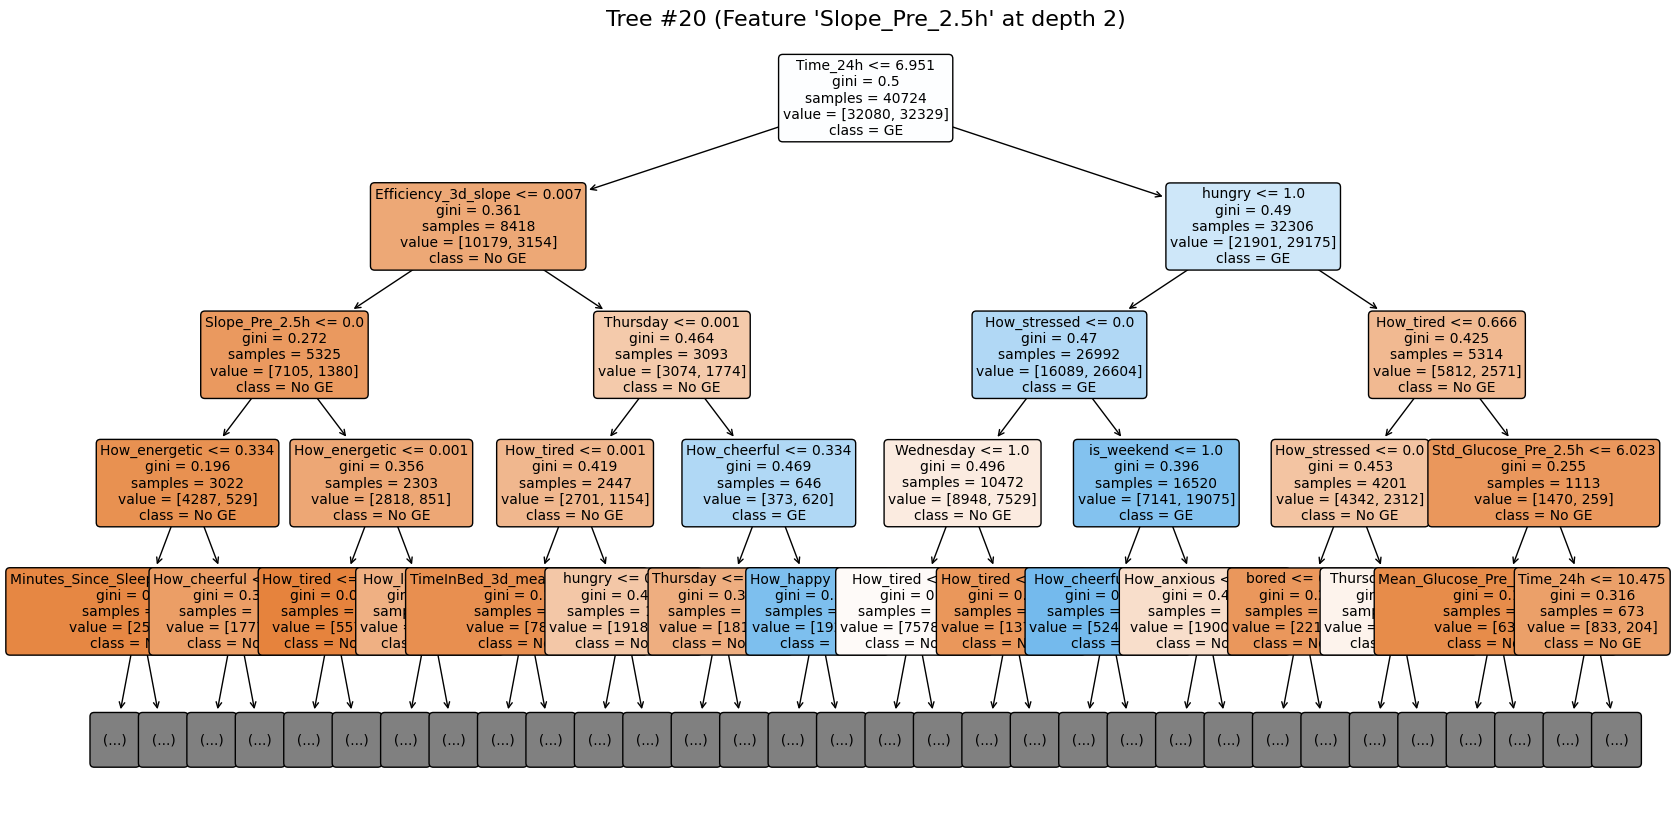

In [148]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Map feature names to their indices
target_features = ["Std_Glucose_Pre_2.5h", "Slope_Pre_2.5h"]
target_indices = [X_columns.index(f) for f in target_features]

# Step 2: Function to compute depth of each node
def compute_node_depths(tree):
    node_depth = np.zeros(shape=tree.tree_.node_count, dtype=np.int64)
    stack = [(0, -1)]  # (node_id, parent_depth)
    while stack:
        node_id, parent_depth = stack.pop()
        current_depth = parent_depth + 1
        node_depth[node_id] = current_depth
        left_child = tree.tree_.children_left[node_id]
        right_child = tree.tree_.children_right[node_id]
        if left_child != right_child:  # if not a leaf
            stack.append((left_child, current_depth))
            stack.append((right_child, current_depth))
    return node_depth

# Step 3: Search for a tree meeting the condition
matched_tree_idx = None
for i, tree in enumerate(smote_model.estimators_):
    node_depths = compute_node_depths(tree)
    for node_id, depth in enumerate(node_depths):
        if 1 <= depth <= 2:
            feature_idx = tree.tree_.feature[node_id]
            if feature_idx in target_indices:
                matched_tree_idx = i
                matched_feature = X_columns[feature_idx]
                matched_depth = depth
                break
    if matched_tree_idx is not None:
        break

# Step 4: Plot the tree if found
if matched_tree_idx is not None:
    print(f"✅ Tree #{matched_tree_idx} uses '{matched_feature}' at depth {matched_depth}")
    tree = smote_model.estimators_[matched_tree_idx]
    plt.figure(figsize=(20, 10))
    plot_tree(
        tree,
        feature_names=X_columns,
        class_names=["No GE", "GE"],
        filled=True,
        rounded=True,
        max_depth=4,
        fontsize=10
    )
    plt.title(f"Tree #{matched_tree_idx} (Feature '{matched_feature}' at depth {matched_depth})", fontsize=16)
    plt.show()
else:
    print("❌ No tree found with specified features at depth 1 or 2.")


Tree #6 uses 'Time_24h' as its root feature.


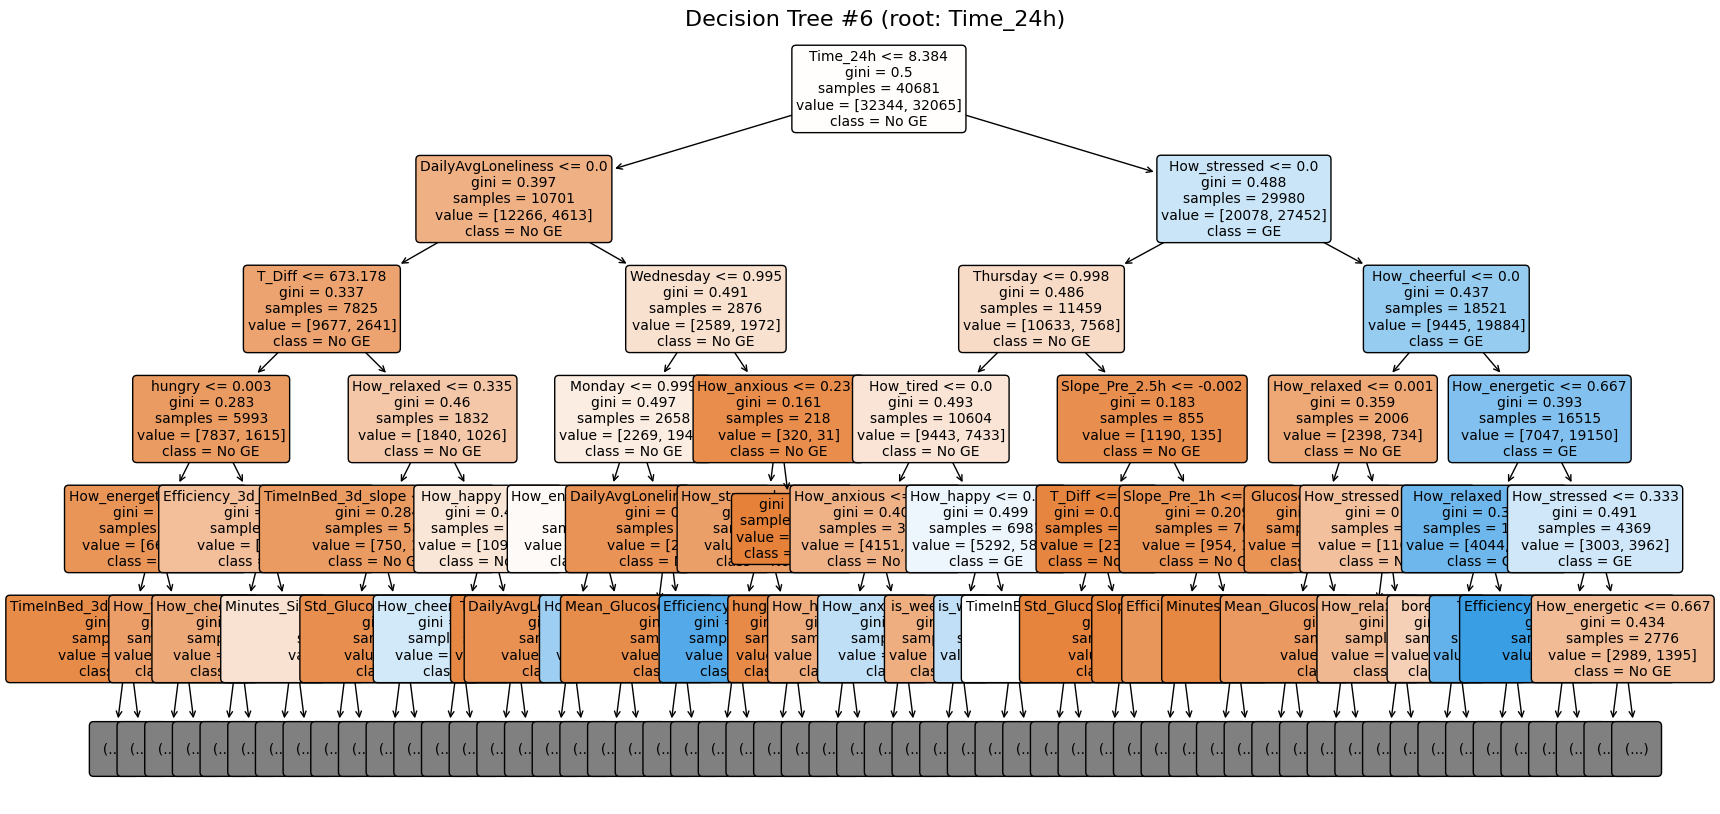

In [59]:
# Step 1: Time_24h의 feature index 확인
target_feature = "Time_24h"
target_index = X_columns.index(target_feature)

# Step 2: 루트 노드에서 해당 feature를 사용하는 트리 찾기
matching_tree_index = None
for i, tree in enumerate(smote_model.estimators_):
    if tree.tree_.feature[0] == target_index:
        matching_tree_index = i
        print(f"Tree #{i} uses '{target_feature}' as its root feature.")
        break

# Step 3: 해당 트리 시각화
if matching_tree_index is not None:
    tree = smote_model.estimators_[matching_tree_index]
    plt.figure(figsize=(20, 10))
    plot_tree(
        tree,
        feature_names=X_columns,
        class_names=["No GE", "GE"],
        filled=True,
        rounded=True,
        max_depth=5,
        fontsize=10
    )
    plt.title(f"Decision Tree #{matching_tree_index} (root: {target_feature})", fontsize=16)
    plt.show()
else:
    print(f"No tree found with '{target_feature}' at the root.")


# XGBoost, LightGBM

/opt/anaconda3/envs/jupyter_env/lib/python3.8/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Time_24h']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/envs/jupyter_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [23:30:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 32222, number of negative: 32222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9681
[LightGBM] [Info] Number of data points in the train set: 64444, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

📊 XGBoost Evaluation:
Accuracy: 0.9685
              precision    recall  f1-score   support

           0     0.9696    0.9989    0.9840      8034
           1     0.0000    0.0000    0.0000       252

    accuracy                         0.9685      8286
   macro avg     0.4848    0.4994    0.4920      8286
weighted avg     0.9401    0.9685    0.9541      8286



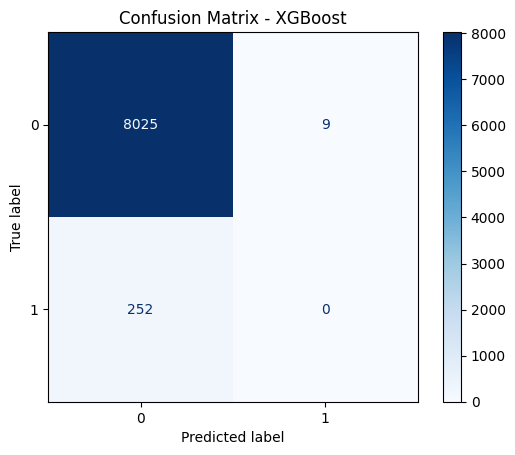


📊 LightGBM Evaluation:
Accuracy: 0.9690
              precision    recall  f1-score   support

           0     0.9696    0.9994    0.9842      8034
           1     0.0000    0.0000    0.0000       252

    accuracy                         0.9690      8286
   macro avg     0.4848    0.4997    0.4921      8286
weighted avg     0.9401    0.9690    0.9543      8286



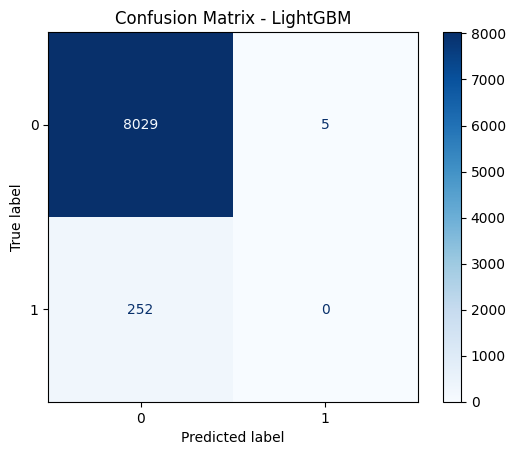

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Features and label setup
X_columns = [
    "Glucose", "is_weekend", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "Mean_Glucose_Pre_1h", "Mean_Glucose_Pre_2h", "Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h", "Std_Glucose_Pre_2h", "Std_Glucose_Pre_2.5h",
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",
    "Time_24h", "bored", "hungry", "How_happy", "How_cheerful", 
    "How_relaxed", "How_stressed", "How_anxious", "How_angry", "How_sad", "How_energetic", 
    "How_tired", "How_lonely", "DailyAvgLoneliness", "T_Diff", "Efficiency", "Efficiency_3d_mean",
    "Efficiency_3d_std", "Efficiency_3d_slope", "TimeInBed_3d_mean", "TimeInBed_3d_std", "TimeInBed_3d_slope", 
    "Minutes_Since_Sleep_End"
]

# 2. Filter and preprocess
df_model = df[X_columns + ["Onset_GE"]].dropna(subset=["Onset_GE"])

# 3. Convert Time_24h to numeric
df_model["Time_24h"] = pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce").dt.hour + \
                       pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce").dt.minute / 60

# 4. X, y setup
X = df_model[X_columns]
y = df_model["Onset_GE"].astype(int)

# 5. Impute missing
X_imputed = SimpleImputer(strategy="mean").fit_transform(X)

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 7. Apply SMOTE only to train set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 8. Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_smote, y_train_smote)

# 9. Train LightGBM
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_smote, y_train_smote)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model_with_confusion(model, X_test, y_test, name="Model"):
    print(f"\n📊 {name} Evaluation:")
    y_pred = model.predict(X_test)

    # 기본 성능 지표
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion matrix 출력
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Run evaluation
evaluate_model_with_confusion(xgb, X_test, y_test, name="XGBoost")
evaluate_model_with_confusion(lgb, X_test, y_test, name="LightGBM")


In [161]:
from sklearn.metrics import precision_recall_curve, classification_report
import numpy as np

def optimize_threshold(model, X_test, y_test, model_name=""):
    y_proba = model.predict_proba(X_test)[:, 1]

    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    print(f"\n🔍 {model_name} Optimal Threshold = {best_threshold:.3f}")
    print(f"Precision = {precision[best_idx]:.4f}, Recall = {recall[best_idx]:.4f}, F1 = {f1_scores[best_idx]:.4f}")

    # Apply threshold
    y_pred_opt = (y_proba >= best_threshold).astype(int)
    print(f"\n📊 {model_name} Classification Report (Threshold = {best_threshold:.3f})")
    print(classification_report(y_test, y_pred_opt, digits=4))
    
    return best_threshold, y_pred_opt

# Optimal threshold 
optimize_threshold(xgb, X_test, y_test, model_name="XGBoost")
optimize_threshold(lgb, X_test, y_test, model_name="LightGBM")



🔍 XGBoost Optimal Threshold = 0.009
Precision = 0.0422, Recall = 0.7976, F1 = 0.0802

📊 XGBoost Classification Report (Threshold = 0.009)
              precision    recall  f1-score   support

           0     0.9855    0.4325    0.6012      8034
           1     0.0422    0.7976    0.0802       252

    accuracy                         0.4436      8286
   macro avg     0.5139    0.6151    0.3407      8286
weighted avg     0.9568    0.4436    0.5854      8286


🔍 LightGBM Optimal Threshold = 0.073
Precision = 0.0541, Recall = 0.1587, F1 = 0.0806

📊 LightGBM Classification Report (Threshold = 0.073)
              precision    recall  f1-score   support

           0     0.9719    0.9129    0.9415      8034
           1     0.0541    0.1587    0.0806       252

    accuracy                         0.8899      8286
   macro avg     0.5130    0.5358    0.5111      8286
weighted avg     0.9440    0.8899    0.9153      8286



(0.0726968805750099, array([0, 0, 0, ..., 0, 0, 1]))

In [163]:
import pandas as pd

# 정리된 성능 지표를 리스트로 구성
model_metrics = [
    {
        "Model": "XGBoost",
        "Threshold": 0.009,
        "Accuracy": 0.4436,
        "Precision (1)": 0.0422,
        "Recall (1)": 0.7976,
        "F1 Score (1)": 0.0802
    },
    {
        "Model": "LightGBM",
        "Threshold": 0.073,
        "Accuracy": 0.8899,
        "Precision (1)": 0.0541,
        "Recall (1)": 0.1587,
        "F1 Score (1)": 0.0806
    },
    {
        "Model": "Random Forest",
        "Threshold": 0.5,
        "Accuracy": 0.6599,
        "Precision (1)": 0.0405,
        "Recall (1)": 0.4484,
        "F1 Score (1)": 0.0742
    }
]

# DataFrame 생성
comparison_df = pd.DataFrame(model_metrics)

# 보기 좋게 출력
print("\n📊 Model Comparison Summary (GE Class - 1):\n")
print(comparison_df.to_string(index=False))



📊 Model Comparison Summary (GE Class - 1):

        Model  Threshold  Accuracy  Precision (1)  Recall (1)  F1 Score (1)
      XGBoost      0.009    0.4436         0.0422      0.7976        0.0802
     LightGBM      0.073    0.8899         0.0541      0.1587        0.0806
Random Forest      0.500    0.6599         0.0405      0.4484        0.0742


# ALE

In [118]:
# Feature importance from RandomForest
import pandas as pd

rf_importances = pd.Series(model_raw.feature_importances_, index=X_columns)
top3_rf_features = rf_importances.sort_values(ascending=False).head(3).index.tolist()
print("📌 Top 3 Features from RandomForest:", top3_rf_features)


📌 Top 3 Features from RandomForest: ['Std_Glucose_Pre_2.5h', 'Slope_Pre_2.5h', 'Time_24h']


In [227]:
pip install alepython


Note: you may need to restart the kernel to use updated packages.


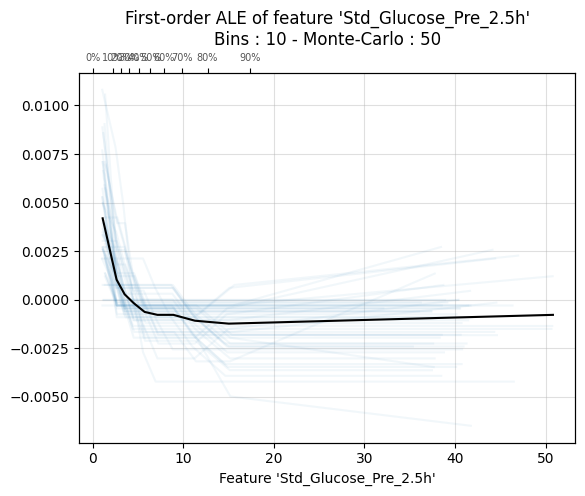

<Axes: title={'center': "First-order ALE of feature 'Std_Glucose_Pre_2.5h'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Std_Glucose_Pre_2.5h'">

In [239]:
import matplotlib.pyplot as plt
from alepython import ale_plot

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but RandomForestClassifier was fitted without feature names")


# ✅ Target feature
target_feature = "Std_Glucose_Pre_2.5h"

# ✅ Ensure DataFrame for alepython
X_train_df = pd.DataFrame(X_train, columns=X_columns)

# ✅ ALE Plot

ale_plot(model_smote, X_train_df, target_feature, monte_carlo=True)




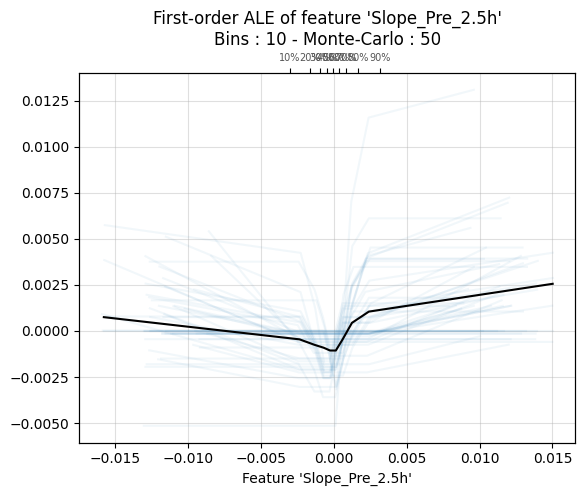

<Axes: title={'center': "First-order ALE of feature 'Slope_Pre_2.5h'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Slope_Pre_2.5h'">

In [241]:
import matplotlib.pyplot as plt
from alepython import ale_plot

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but RandomForestClassifier was fitted without feature names")

# ✅ Target feature
target_feature = "Slope_Pre_2.5h"

# ✅ Ensure DataFrame for alepython
X_train_df = pd.DataFrame(X_train, columns=X_columns)

# ✅ ALE Plot

ale_plot(model_smote, X_train_df, target_feature, monte_carlo=True)



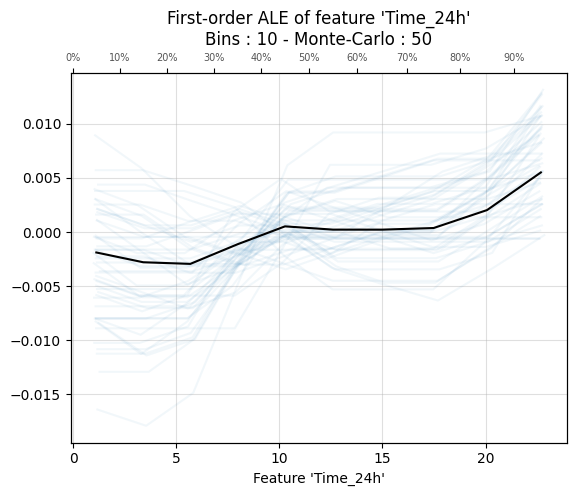

<Axes: title={'center': "First-order ALE of feature 'Time_24h'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Time_24h'">

In [243]:
import matplotlib.pyplot as plt
from alepython import ale_plot

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but RandomForestClassifier was fitted without feature names")

# ✅ Target feature
target_feature = "Time_24h"

# ✅ Ensure DataFrame for alepython
X_train_df = pd.DataFrame(X_train, columns=X_columns)

# ✅ ALE Plot

ale_plot(model_smote, X_train_df, target_feature, monte_carlo=True)

<Figure size 800x500 with 0 Axes>

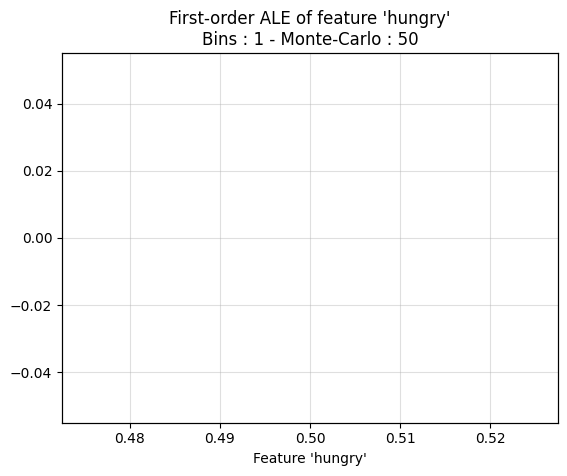

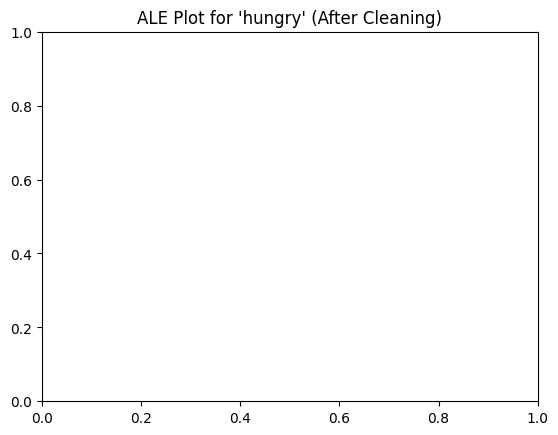

In [259]:
import matplotlib.pyplot as plt
from alepython import ale_plot

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but RandomForestClassifier was fitted without feature names")

# ALE 
from alepython import ale_plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ale_plot(model_smote, X_train_df_clean, "hungry", monte_carlo=True, bins=2)
plt.title("ALE Plot for 'hungry' (After Cleaning)")
plt.show()


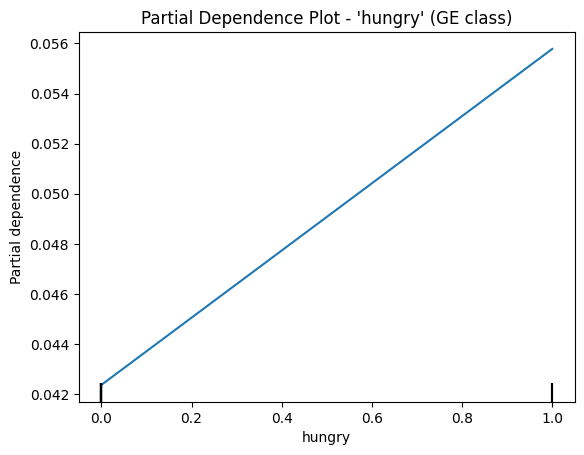

In [261]:
from sklearn.inspection import PartialDependenceDisplay

# plot PDP
PartialDependenceDisplay.from_estimator(
    model_smote,
    X_train_df,
    features=["hungry"],
    kind="average",
    target=1,  # Class 1: GE
    grid_resolution=2
)
plt.title("Partial Dependence Plot - 'hungry' (GE class)")
plt.show()


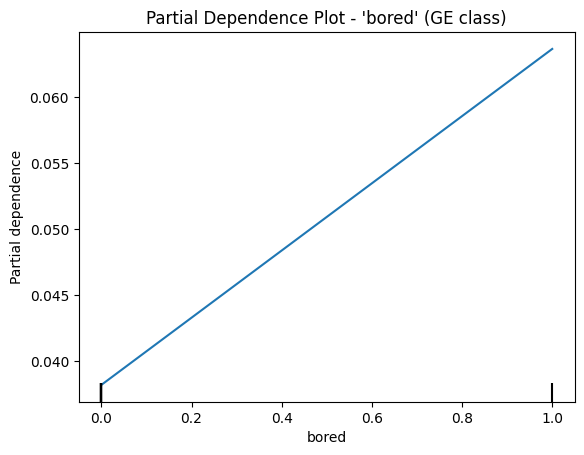

In [263]:
from sklearn.inspection import PartialDependenceDisplay

# plot PDP
PartialDependenceDisplay.from_estimator(
    model_smote,
    X_train_df,
    features=["bored"],
    kind="average",
    target=1,  # Class 1: GE
    grid_resolution=2
)
plt.title("Partial Dependence Plot - 'bored' (GE class)")
plt.show()


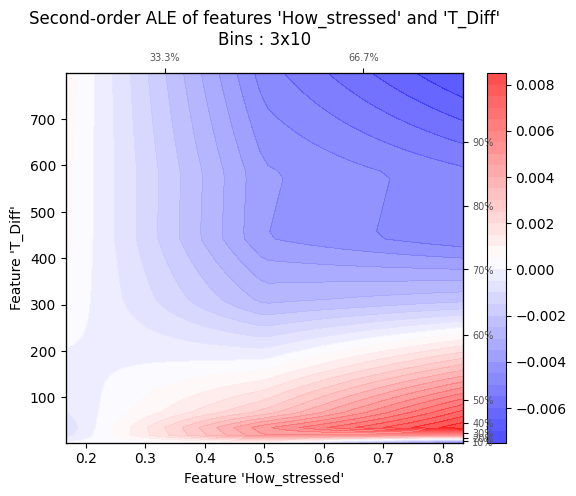

<Axes: title={'center': "Second-order ALE of features 'How_stressed' and 'T_Diff'\nBins : 3x10"}, xlabel="Feature 'How_stressed'", ylabel="Feature 'T_Diff'">

In [245]:
import matplotlib.pyplot as plt
from alepython import ale_plot

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but RandomForestClassifier was fitted without feature names")

# 
X_train_df = pd.DataFrame(X_train, columns=X_columns)

#  How_stressed vs T_Diff
feature_pair = ["How_stressed", "T_Diff"]

# 2D ALE Plot
ale_plot(
    model=model_smote,
    train_set=X_train_df,
    features=feature_pair,
    bins=10
)



🔍 2D ALE Plot: How_happy vs T_Diff


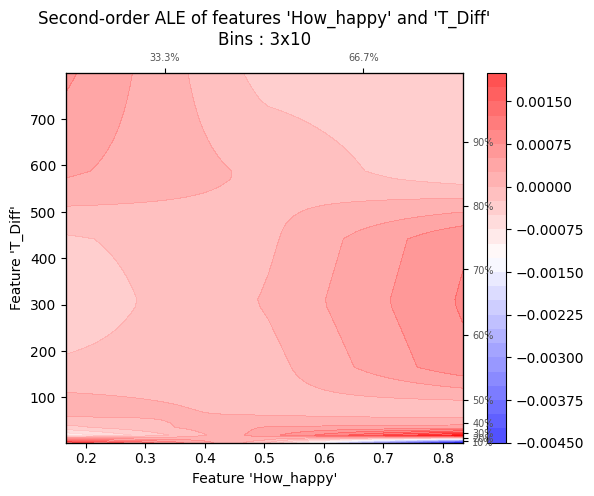


🔍 2D ALE Plot: How_cheerful vs T_Diff


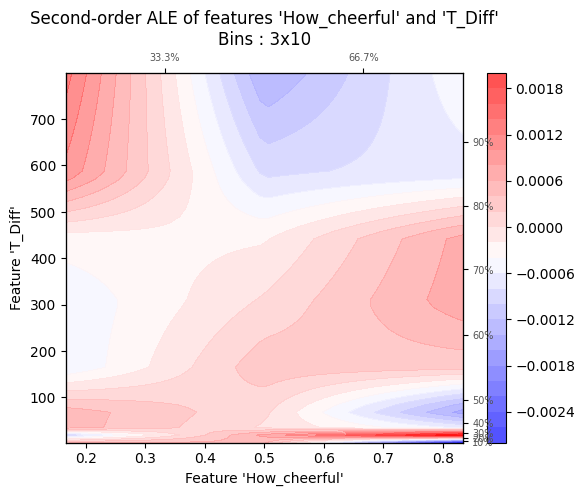


🔍 2D ALE Plot: How_relaxed vs T_Diff


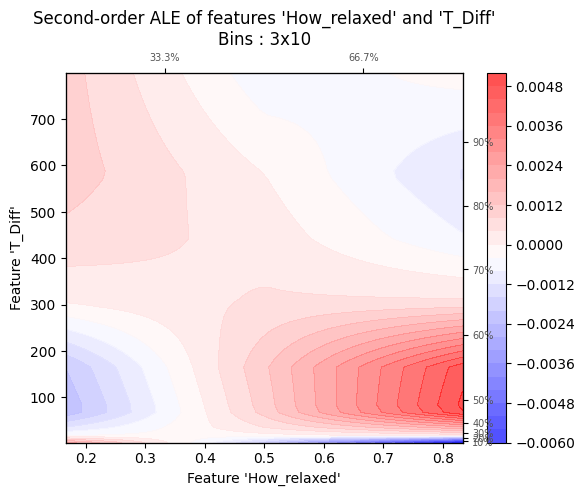


🔍 2D ALE Plot: How_stressed vs T_Diff


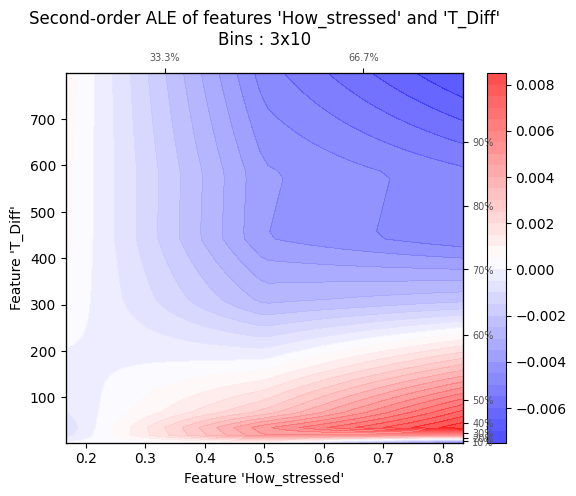


🔍 2D ALE Plot: How_anxious vs T_Diff


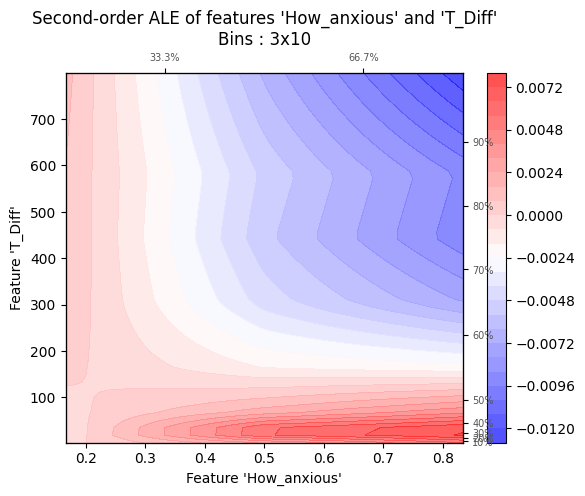


🔍 2D ALE Plot: How_angry vs T_Diff


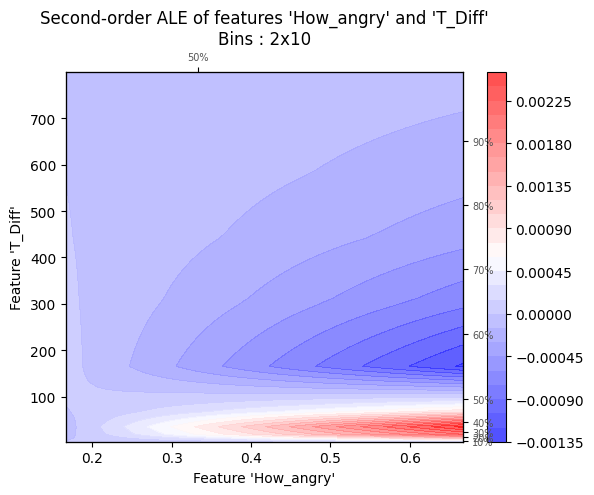


🔍 2D ALE Plot: How_sad vs T_Diff


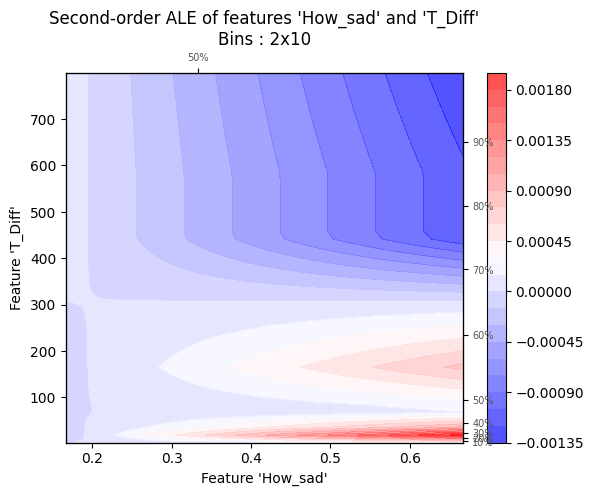


🔍 2D ALE Plot: How_energetic vs T_Diff


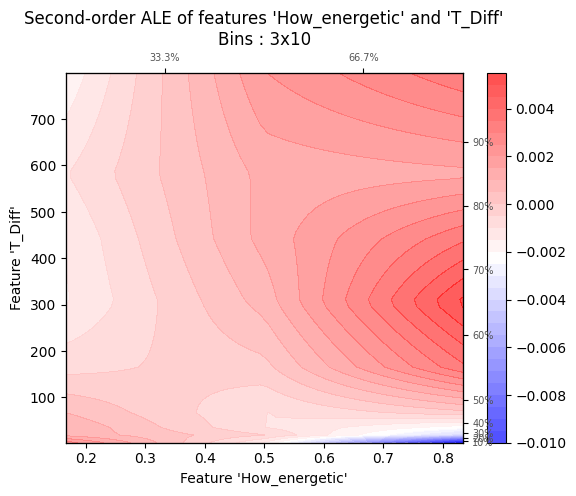


🔍 2D ALE Plot: How_tired vs T_Diff


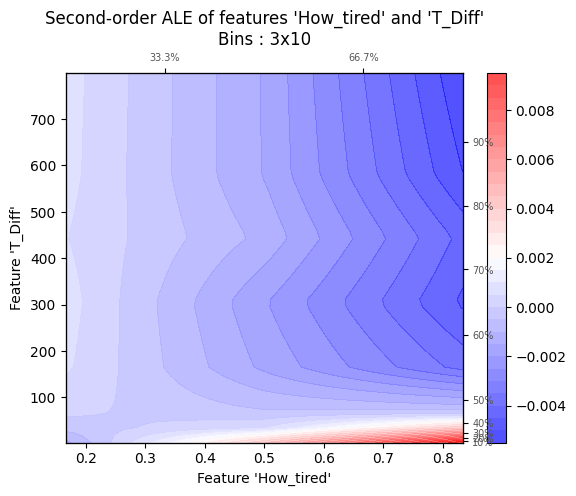


🔍 2D ALE Plot: How_lonely vs T_Diff


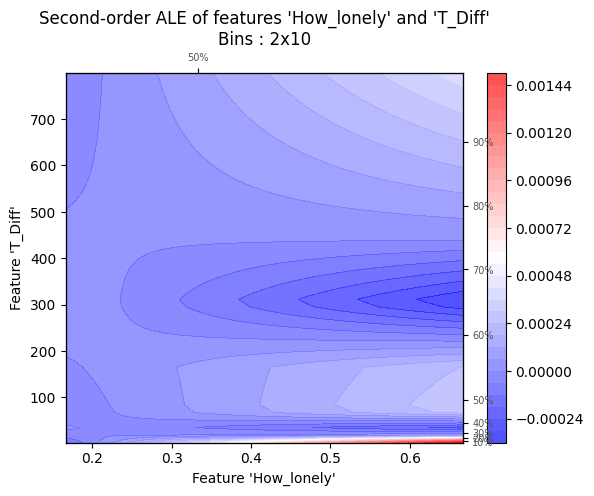

In [253]:
import matplotlib.pyplot as plt
from alepython import ale_plot

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but RandomForestClassifier was fitted without feature names")

ema_vars = [
    "How_happy", "How_cheerful", "How_relaxed", "How_stressed",
    "How_anxious", "How_angry", "How_sad", "How_energetic", "How_tired", "How_lonely"
]

for var in ema_vars:
    print(f"\n🔍 2D ALE Plot: {var} vs T_Diff")
    try:
        ale_plot(
            model=model_smote,
            train_set=X_train_df,
            features=[var, "T_Diff"],
            bins=10
        )
    except Exception as e:
        print(f"❗ Error for {var}: {e}")


In [26]:
import pandas as pd

updated_onset_file_path = "/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/updated_onset_with_positive_E_T_Diff.csv"
# 데이터 불러오기
updated_onset_df = pd.read_csv(updated_onset_file_path)

# Timestamp 및 EMA_time을 datetime 형식으로 변환
updated_onset_df["Timestamp"] = pd.to_datetime(updated_onset_df["Timestamp"])
updated_onset_df["EMA_time"] = pd.to_datetime(updated_onset_df["EMA_time"])

# E_T_Diff 재계산 (Timestamp - EMA_time)
updated_onset_df["E_T_Diff"] = (updated_onset_df["Timestamp"] - updated_onset_df["EMA_time"]).dt.total_seconds()

# 초 단위를 반올림하여 분과 초로 변환
updated_onset_df["E_T_Diff"] = updated_onset_df["E_T_Diff"].apply(
    lambda x: f"{int(abs(x) // 60):02}:{int(round(abs(x) % 60)):02}" if x >= 0 else f"-{int(abs(x) // 60):02}:{int(round(abs(x) % 60)):02}"
)

# 결과 저장
output_file_path = "EMA_Diff.csv"
updated_onset_df.to_csv(output_file_path, index=False)

print(f"✅ 파일이 저장되었습니다: {output_file_path}")

✅ 파일이 저장되었습니다: EMA_Diff.csv


<Figure size 1000x600 with 0 Axes>

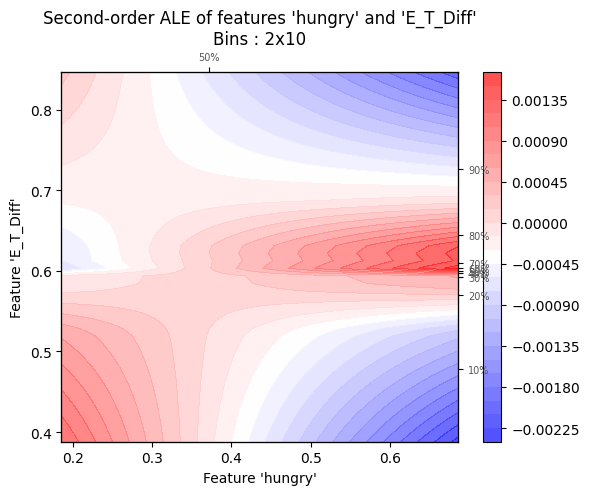

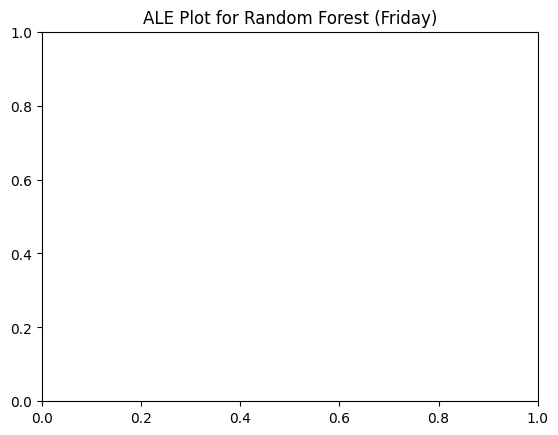

In [99]:
import matplotlib.pyplot as plt
from alepython import ale_plot

# ✅ ALE Plot for Random Forest
plt.figure(figsize=(10, 6))
ale_plot(rf_model, X_train, ['hungry', 'E_T_Diff'], monte_carlo=True, bins=10)
plt.title(f"ALE Plot for Random Forest ({target_feature})")
plt.show()


